In [76]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import netCDF4 as nc
import os
import matplotlib.pyplot as plt

In [107]:
sst_traj_one = xr.open_dataset('trajectories_tas/tas_traj0007.nc')

In [108]:
sst_df = sst_traj_one.to_dataframe()
print(sst_df['time_bnds'].unique())
for col in sst_df.columns:
    print(col)
sst_df.head()

[17160201. 17160230. 17160301. 17160330. 17160401. 17160430. 17160501.
 17160530. 17160601. 17160630. 17160701. 17160730. 17160801. 17160830.
 17160901. 17160930. 17161001. 17161030. 17161101. 17161130. 17161201.
 17161230. 17170101. 17170130. 34120201. 34120230. 34120301. 34120330.
 34120401. 34120430. 34120501. 34120530. 34120601. 34120630. 34120701.
 34120730. 34120801. 34120830. 34120901. 34120930. 34121001. 34121030.
 34121101. 34121130. 34121201. 34121230. 34130101. 34130130. 35120201.
 35120230. 35120301. 35120330. 35120401. 35120430. 35120501. 35120530.
 35120601. 35120630. 35120701. 35120730. 35120801. 35120830. 35120901.
 35120930. 35121001. 35121030. 35121101. 35121130. 35121201. 35121230.
 35130101. 35130130. 36120201. 36120230. 36120301. 36120330. 36120401.
 36120430. 36120501. 36120530. 36120601. 36120630. 36120701. 36120730.
 36120801. 36120830. 36120901. 36120930. 36121001. 36121030. 36121101.
 36121130. 36121201. 36121230. 36130101. 36130130. 37120201. 37120230.
 37120

time_bnds         tas
time       bnds lon lat                              
17160215.5 0    0.0 85.760587  17160201.0  218.071198
                    80.268779  17160201.0  228.140259
                    74.744540  17160201.0  242.178848
                    69.212976  17160201.0  257.619202
                    63.678636  17160201.0  265.481323

In [109]:
sst_df = sst_df.reset_index()

In [102]:
sst_df.head()

,time,bnds,lon,lat,time_bnds,tas,year,Year Counter
0,15160215.5,0,0.0,85.760587,15160201.0,231.650528,1516,1
1,15160215.5,0,0.0,80.268779,15160201.0,244.882645,1516,1
2,15160215.5,0,0.0,74.744540,15160201.0,256.523895,1516,1
3,15160215.5,0,0.0,69.212976,15160201.0,265.612427,1516,1
4,15160215.5,0,0.0,63.678636,15160201.0,269.773499,1516,1


In [120]:
#get just the year
#make a list of unique time_bnds
def make_bounds(df):
    df['year'] = df['time_bnds'].astype(str).str[:4]
    time_bnds_list = df['year'].unique()
    bounds=[]
    #print length of list
    for time in time_bnds_list:
        bound = df.loc[df['year']==time]
        bounds.append(len(bound))
    #make a new column with a counter, changing at each end of list
    values=[]
    #get length of bounds
    print(bounds[0])
    bound_length = bounds[0] + bounds[1]
    for i in range(1, 11):
        values += [i] * bound_length
    return values

In [98]:
sst_df['Year Counter'] = values

In [103]:
weights = np.cos(np.deg2rad(sst_df['lat']))
sst_df['weighted_tas'] = sst_df['tas'] * weights

<Axes: xlabel='Year Counter', ylabel='weighted_tas'>

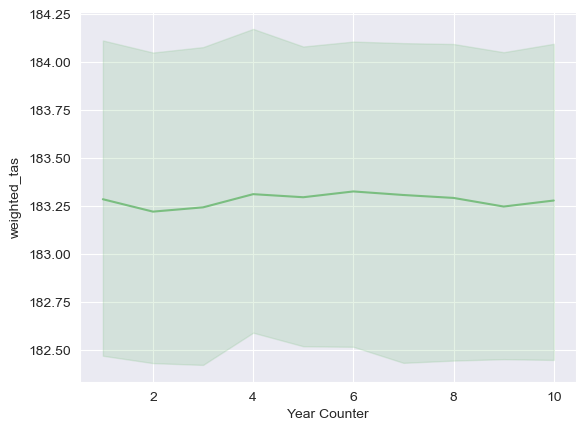

In [106]:
sns.lineplot(data=sst_df,x='Year Counter',y='weighted_tas')

In [ ]:
#ensemble spread
folder_path='trajectories_tas/'
plt.figure()
for file in os.listdir(folder_path):
    if file.endswith(".nc"):
        print(file)
        sst_annual=xr.open_dataset(os.path.join(folder_path, file))
        sst_df = sst_annual.to_dataframe()
        reset = sst_df.reset_index()
        reset['Year Counter'] = make_bounds(reset)
        weights = np.cos(np.deg2rad(reset['lat']))
        reset['weighted_tas'] = reset['tas'] * weights
        sns.lineplot(data=reset,x='Year Counter',y='weighted_tas')
plt.show()
plt.close()

tas_traj0006.nc
45056
tas_traj0002.nc
45056
tas_traj0003.nc
45056


In [63]:
print(sst_traj_one.time)
print(len(sst_traj_one.time))

<xarray.DataArray 'time' (time: 20)> Size: 160B
array([15160715.5, 15170115.5, 18970715.5, 18980115.5, 34100715.5, 34110115.5,
       35100715.5, 35110115.5, 36100715.5, 36110115.5, 37100715.5, 37110115.5,
       39110715.5, 39120115.5, 40110715.5, 40120115.5, 41110715.5, 41120115.5,
       42110715.5, 42120115.5])
Coordinates:
  * time     (time) float64 160B 1.516e+07 1.517e+07 ... 4.211e+07 4.212e+07
Attributes:
    standard_name:  time
    bounds:         time_bnds
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T
20


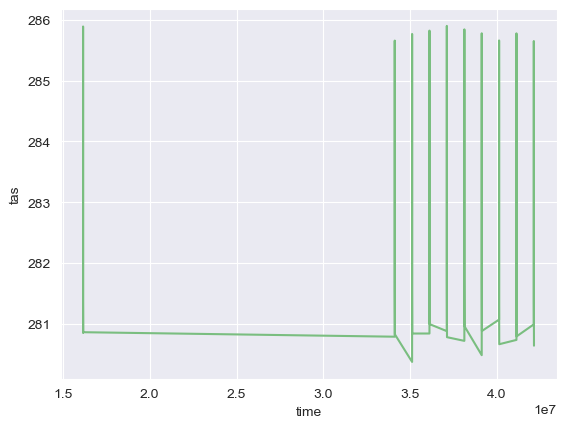

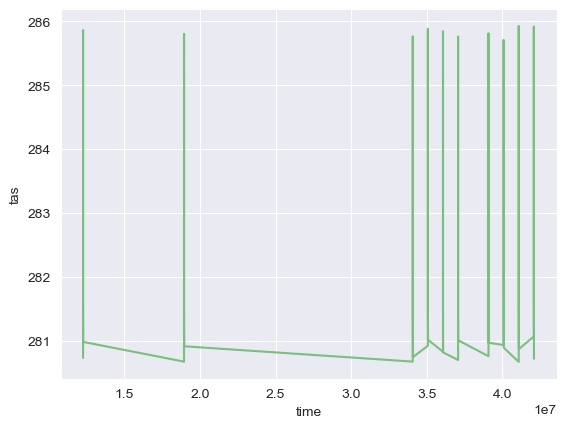

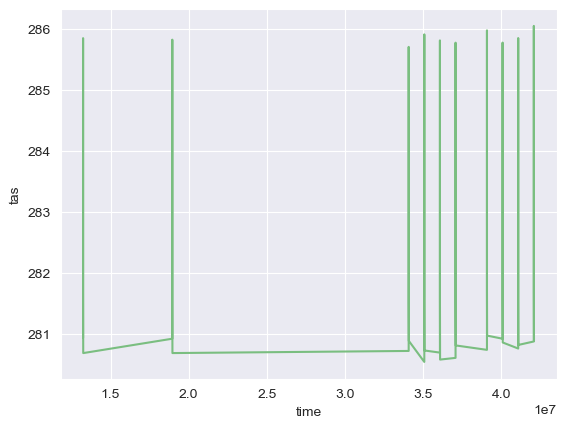

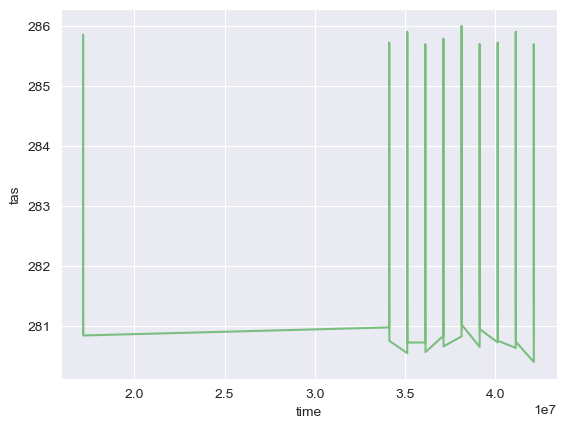

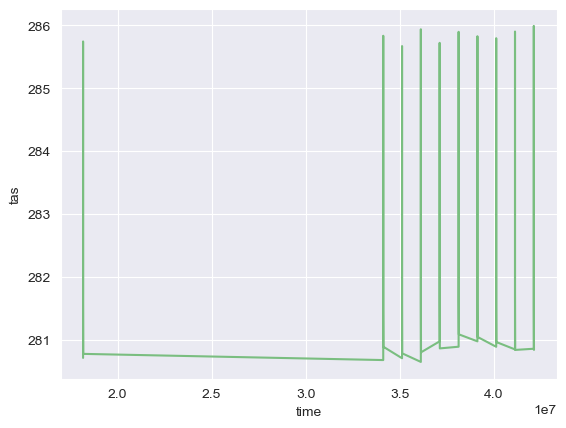

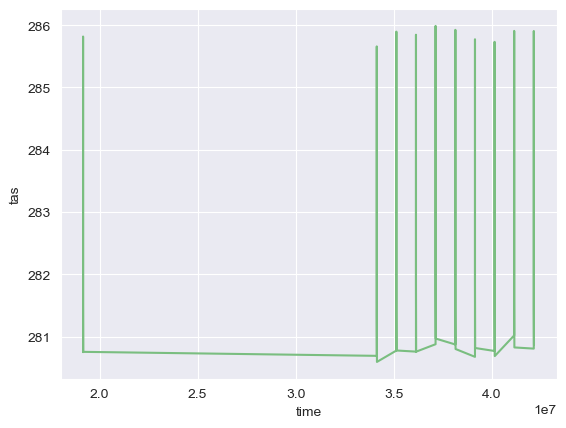

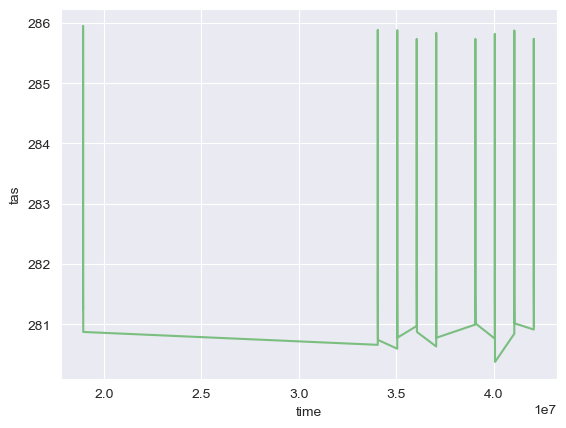

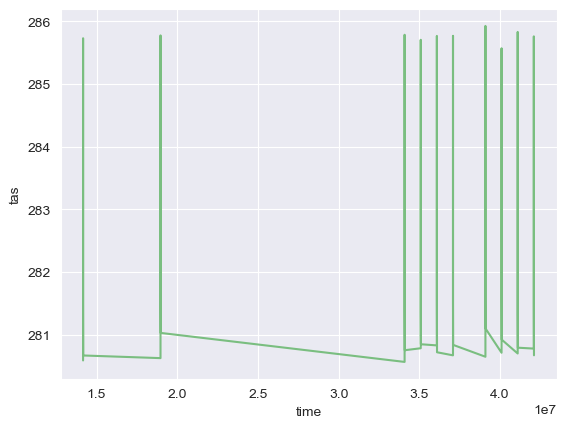

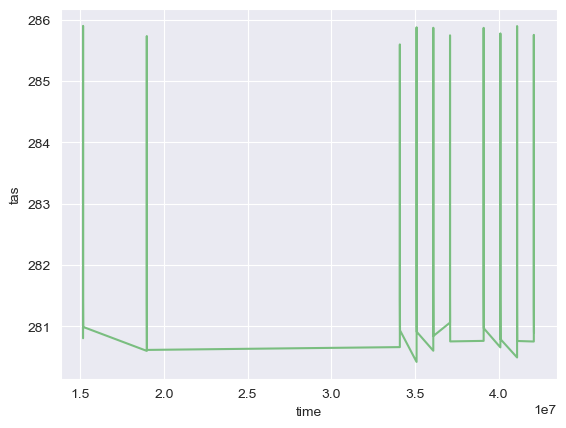

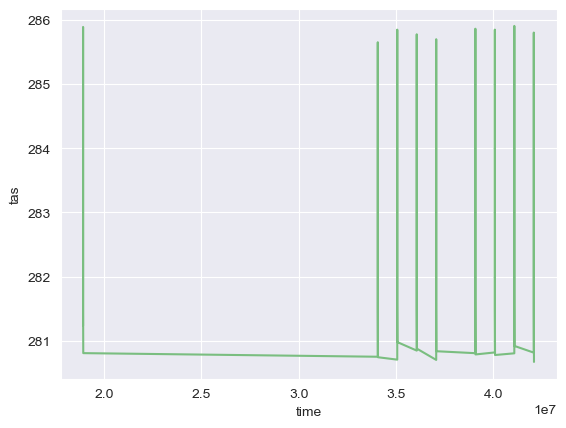

In [81]:
folder_path='trajectories_tas/'
for file in os.listdir(folder_path):
    if file.endswith(".nc"):
        #print(file)
        sst_annual=xr.open_dataset(os.path.join(folder_path, file))
        #sst_annual.tas
        sns.set_palette(['#7abe80'])
        sns.set_style("darkgrid")

        weights = np.cos(np.deg2rad(sst_annual.lat))
        tas_mean = sst_annual.tas.weighted(weights).mean(("lat","lon"))
        #print(tas_mean)
        plt.figure()
        tas_mean.plot()
        plt.show()
        plt.close()

tas_traj0073.nc
tas_traj0022.nc
tas_traj0080.nc
tas_traj0016.nc
tas_traj0047.nc
tas_traj0057.nc
tas_traj0006.nc
tas_traj0090.nc
tas_traj0032.nc
tas_traj0063.nc
tas_traj0043.nc
tas_traj0012.nc
tas_traj0026.nc
tas_traj0077.nc
tas_traj0084.nc
tas_traj0094.nc
tas_traj0067.nc
tas_traj0036.nc
tas_traj0002.nc
tas_traj0053.nc
tas_traj0042.nc
tas_traj0013.nc
tas_traj0027.nc
tas_traj0076.nc
tas_traj0085.nc
tas_traj0095.nc
tas_traj0066.nc
tas_traj0037.nc
tas_traj0003.nc
tas_traj0052.nc
tas_traj0072.nc
tas_traj0023.nc
tas_traj0081.nc
tas_traj0017.nc
tas_traj0046.nc
tas_traj0056.nc
tas_traj0007.nc
tas_traj0091.nc
tas_traj0033.nc
tas_traj0062.nc
tas_traj0079.nc
tas_traj0028.nc
tas_traj0038.nc
tas_traj0069.nc
tas_traj0049.nc
tas_traj0018.nc
tas_traj0008.nc
tas_traj0059.nc
tas_traj0048.nc
tas_traj0019.nc
tas_traj0009.nc
tas_traj0058.nc
tas_traj0078.nc
tas_traj0029.nc
tas_traj0039.nc
tas_traj0068.nc
tas_traj0088.nc
tas_traj0098.nc
tas_traj0089.nc
tas_traj0099.nc
tas_traj0010.nc
tas_traj0041.nc
tas_traj

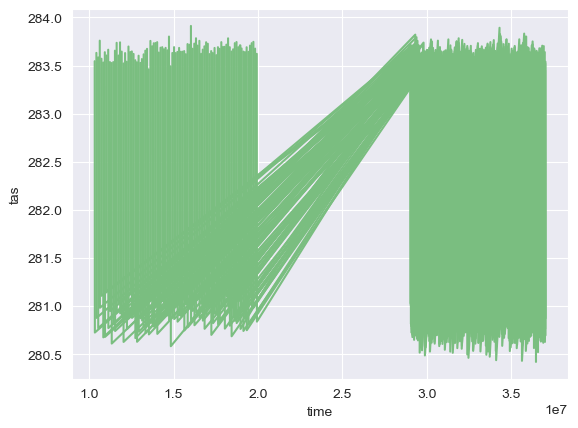

In [53]:
#ensemble spread
folder_path='tas_trajs/'
plt.figure()
for file in os.listdir(folder_path):
    if file.endswith(".nc"):
        print(file)
        sst_annual=xr.open_dataset(os.path.join(folder_path, file))
        
        weights = np.cos(np.deg2rad(sst_annual.lat))
        tas_mean = sst_annual.tas.weighted(weights).mean(("lat","lon"))
        tas_mean.plot()
plt.show()
plt.close()

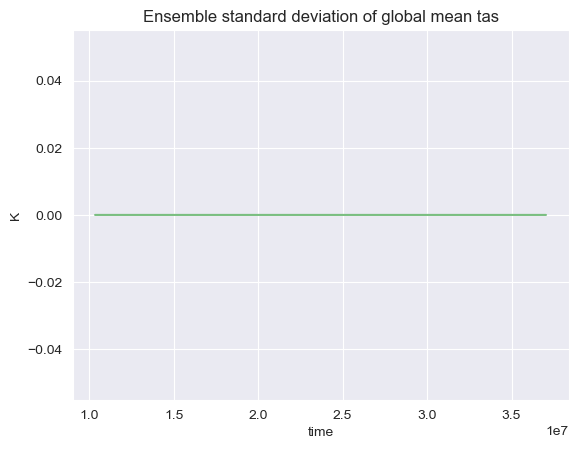

In [54]:
#std deviation as a function of time
folder_path = "tas_trajs/"

members = []

for file in sorted(os.listdir(folder_path)):
    if file.endswith(".nc"):
        ds = xr.open_dataset(os.path.join(folder_path, file))

        weights = np.cos(np.deg2rad(ds.lat))
        tas_mean = ds.tas.weighted(weights).mean(("lat", "lon"))

        members.append(tas_mean)

# Stack into (member, time)
ensemble = xr.concat(members, dim="member")
ensemble = ensemble.assign_coords(member=np.arange(len(members)))

#gives the std dev over time
tas_std = ensemble.std(dim="member")

plt.figure()
tas_std.plot()
plt.title("Ensemble standard deviation of global mean tas")
plt.ylabel("K")
plt.show()